In [1]:
import numpy as np
import itertools 
import ezc3d
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

In [2]:
from ezc3d import c3d
import numpy as np

def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = np.around(c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]*1000)
    
    return [event, time]

# Obliczenie włączenia i wyłączenia mięśnia

In [3]:
data_path=r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K01.c3d"
#data_path=r"C:\Users\gmultimedia.PJATK15\Desktop\pjatk_M_K\2020-08-06-B0446-S01-E01-T01.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pyomeca import Analogs

import dataprocesing as dp

freq=1000
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
def onset_offset_muscles(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    emg.plot(x="time", col="channel", col_wrap=3)
    
    plt.show()
    emg = dp.emg_full_preproces(data_path)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),   # mean of the signal 
        #threshold= emg[i].std(),
        n_above=freq / 4,                     # we want at least 1/2 second above the threshold
        n_below=freq / 4,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=4, 
                        top=1, 
                        wspace=0.25, 
                        hspace=0.35)
        
        for (start, end) in onsets:
            plt.axvline(x=start/1000, color="g") #dzielimy przez 1000 (tyle odczytujemy klatek na sec), aby była ta sama skala (przejście z klatek na sekundy)
            plt.axvline(x=end/1000, color="r")
            emg[i].plot()
            #emg_std.plot()
            
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
    
        plt.title("Aktywacja pracy mięśnia - "+muscles_names[i])
        plt.xlabel("time")
        plt.ylabel("analogs")
        plt.show()
    
                        


In [5]:
#onset_offset_muscles(data_path)

#  Określenie ocinków i podfaz

In [6]:
data_path=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K02.c3d"
#data_path=r"C:\Users\gmultimedia.PJATK15\Desktop\pjatk_M_K\2020-08-06-B0446-S01-E01-T01.c3d"
muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pyomeca import Analogs

import dataprocesing as dp

freq=1000
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
def onset_offset_muscles(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    #emg.plot(x="time", col="channel", col_wrap=3)
    
    #plt.show()
    
    emg = dp.emg_full_preproces(data_path)
    
    #emg=emg.meca.time_normalize(n_frames=1000)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),   # mean of the signal 
        
        #threshold2= emg[i].std(),
            
        n_above=freq / 4,                     # we want at least 1/2 second above the threshold
        n_below=freq / 4,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=5, 
                        top=0.25, 
                        wspace=0.25, 
                        hspace=0.35)
        
        for (start, end) in onsets:
            
            #plt.axvline(x=start/1000, color="g") #dzielimy przez 1000 (tyle odczytujemy klatek na sec), aby była ta sama skala (przejście z klatek na sekundy)
            #plt.axvline(x=end/1000, color="r")
            plt.axvspan(start/1000, end/1000, color="b")
            
            emg[i].plot(color="r")
            
            #emg_std.plot()
            
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
    
        plt.title("Aktywacja pracy mięśnia - "+muscles_names[i])
        plt.xlabel("time")
        plt.ylabel("analogs")
        plt.show()
    

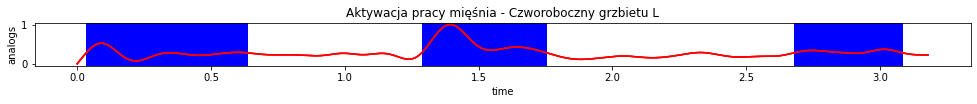

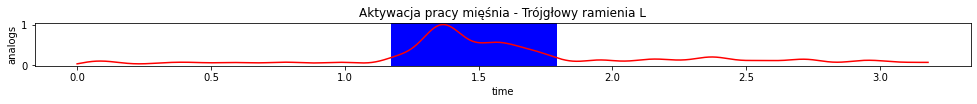

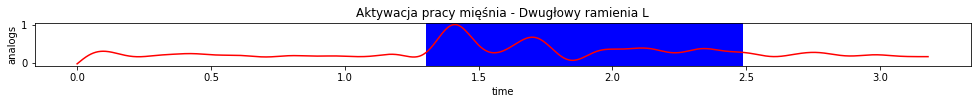

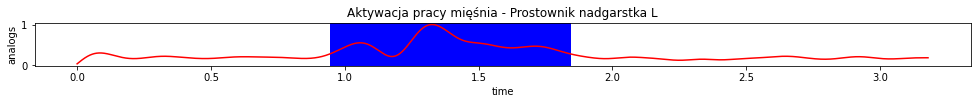

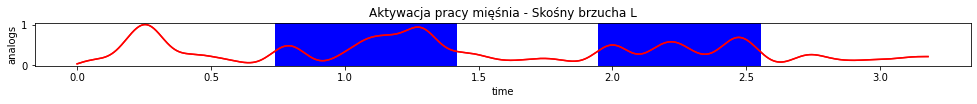

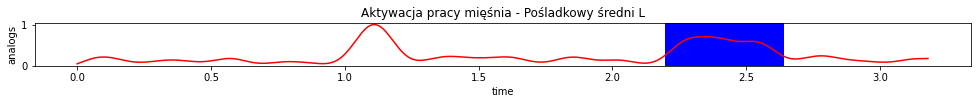

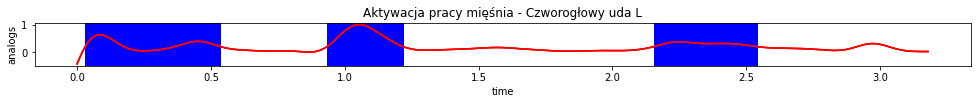

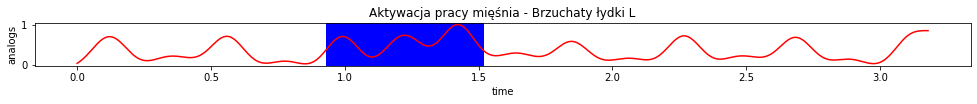

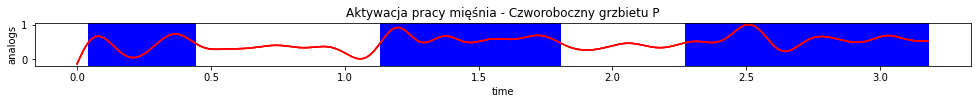

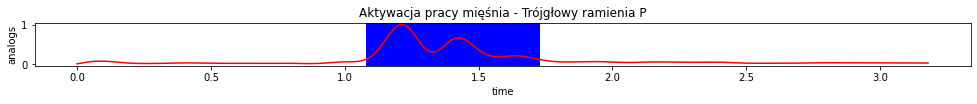

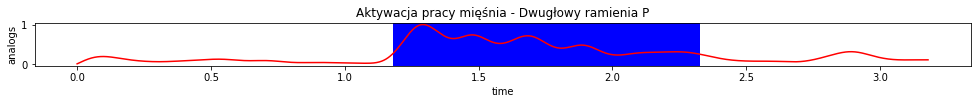

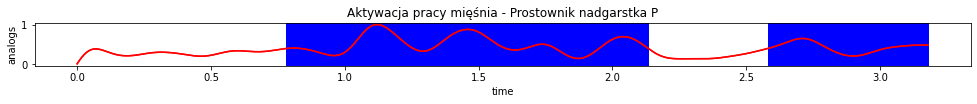

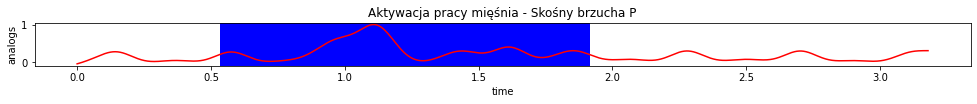

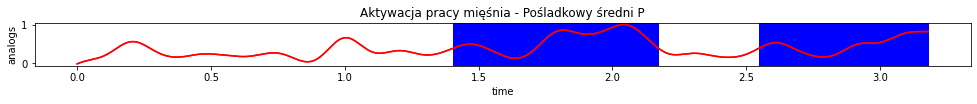

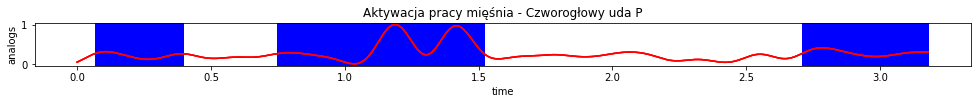

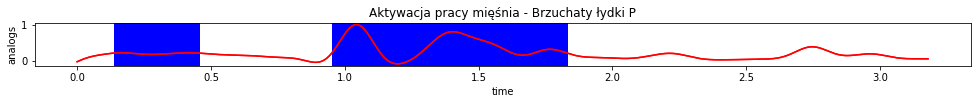

In [8]:
onset_offset_muscles(data_path)

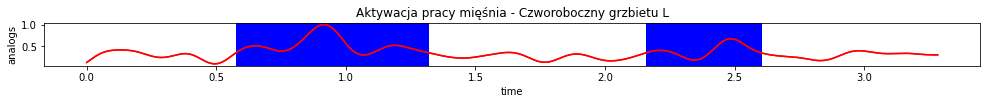

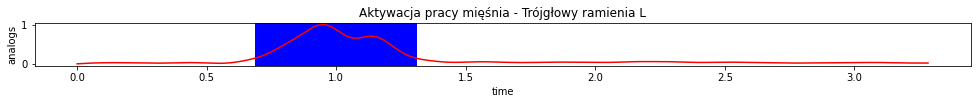

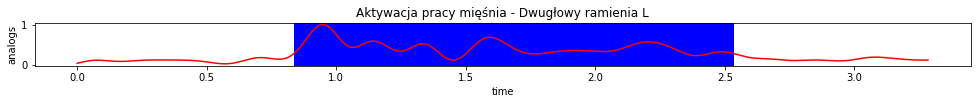

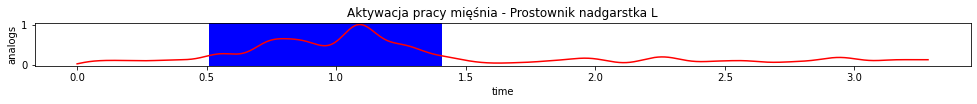

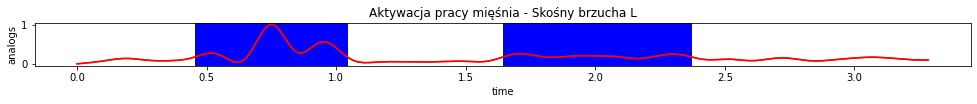

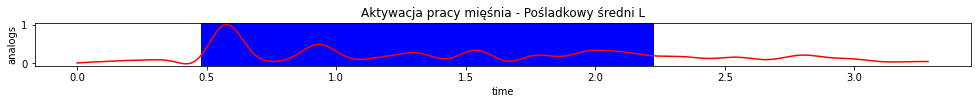

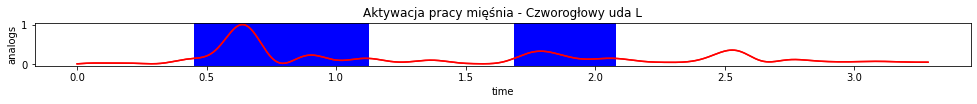

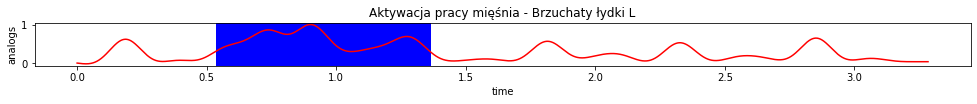

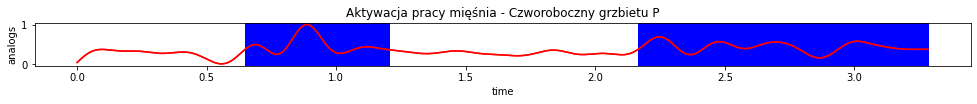

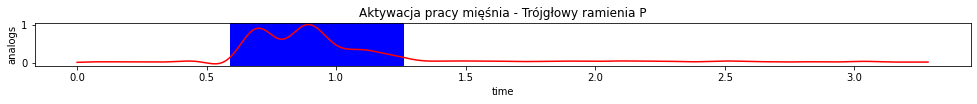

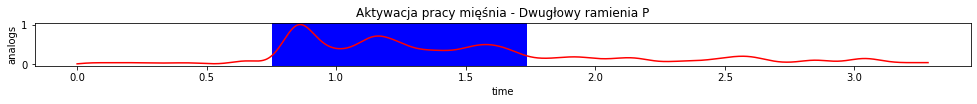

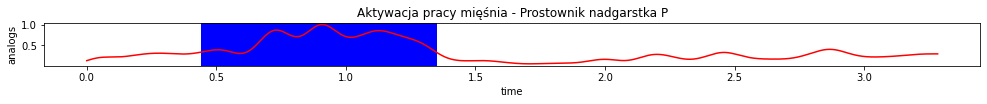

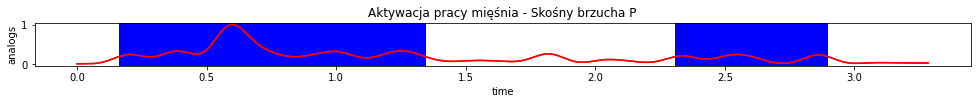

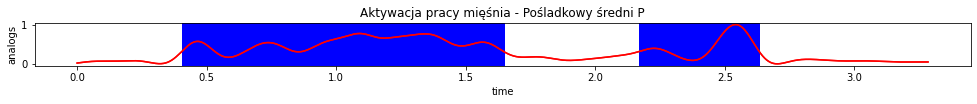

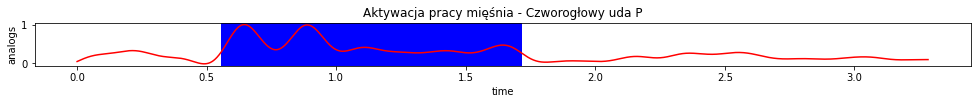

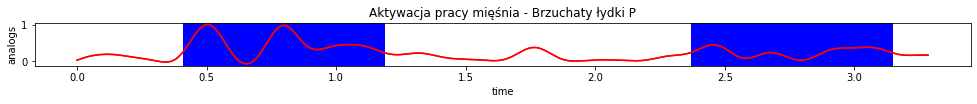

In [9]:
data_path2=r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K01.c3d"
onset_offset_muscles(data_path2)

# Określenie ocinków i podfaz

In [25]:
data_path3=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K03.c3d"
data_path4=r"Z:\baza\2020-08-05-B0444-S01-E03-T05-K06.c3d"

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import sys
from pyomeca import Analogs

import dataprocesing as dp

freq=1000
muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
def onset_offset_muscles_z_przesunieciem(data_path):
 
    #emgs= dp.normalize_emg(analogs)
    
    emg=Analogs.from_c3d(data_path, usecols=muscles)
    emg=dp.normalize_emg(emg)
    
    #emg.plot(x="time", col="channel", col_wrap=3)
    
    #plt.show()
    #emg=dp.nowy_czas_analog()
    emg = dp.emg_full_preproces(data_path)
    #emg=emg.meca.time_normalize(n_frames=1000)
    #emg[9].plot()
    #plt.show()
    
    for i in range(16):
        
        #print(len(emg[i]))
        #emg[i].plot(x="time", col="channel", col_wrap=3)
        
        s,k=dp.nowy_czas_analog([1], [len(emg[i])], emg[i])
    
        onsets =  emg[i].meca.detect_onset(   #.sel(channel=["Voltage.1"]
        threshold= emg[i].mean(),   # mean of the signal 
            
        #threshold2= emg[i].std(),
            
        n_above=freq / 4,                     # we want at least 1/2 second above the threshold
        n_below=freq / 4,                     # we accept point below threshold for 1/2 second
        )  
        emg_std=emg[i].std()          # odchylenie standardowe
        emg_mean=emg[i].mean()        # średnia
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                        bottom=0.1, 
                        right=5, 
                        top=0.25, 
                        wspace=0.25, 
                        hspace=0.35)
        
        for (start, end) in onsets:
            
            #plt.axvline(x=start/1000, color="g") #dzielimy przez 1000 (tyle odczytujemy klatek na sec), aby była ta sama skala (przejście z klatek na sekundy)
            #plt.axvline(x=end/1000, color="r")
            
            plt.axvspan(start/1000, end/1000, color="b")
            
            #print(k[0].astype(int))
            
            emg[i][s[0].astype(int):k[0].astype(int)].plot(color="r") # zmiana typu zmiennej k na int
            
            #emg_std.plot()
            
        #print(emg_std.values[0])
        #print(emg_std)
        #print(emg_mean)
        #print(emg_std-emg_mean)
        
        #print(threshold)    
    
        plt.title("Aktywacja pracy mięśnia - "+muscles_names[i])
        plt.xlabel("time")
        plt.ylabel("analogs")
        plt.show()
        
        #print(s,k)

In [112]:
# data_path3=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K03.c3d"
# onset_offset_muscles(data_path3)

In [113]:
# data_path4=r"Z:\baza\2020-08-05-B0444-S01-E03-T05-K06.c3d"
# onset_offset_muscles(data_path4)

### Porównanie aktywacji mięśnia z przesunięciem fazy do bez przesuniecia

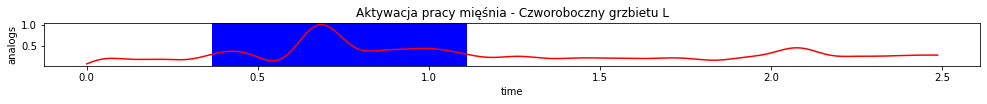

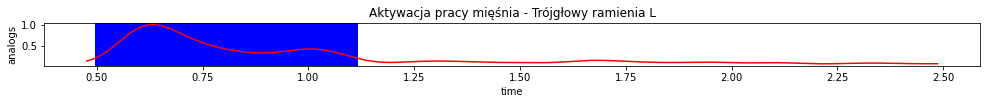

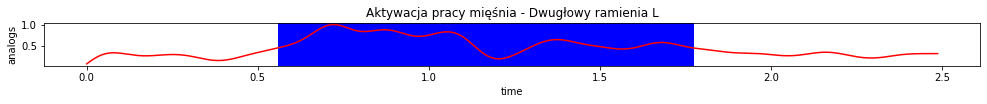

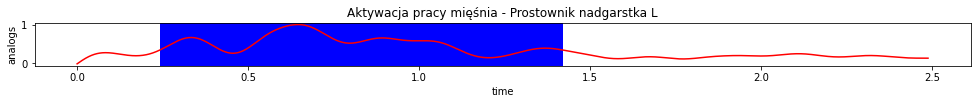

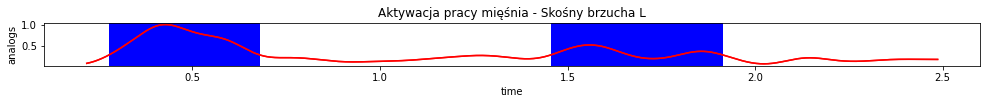

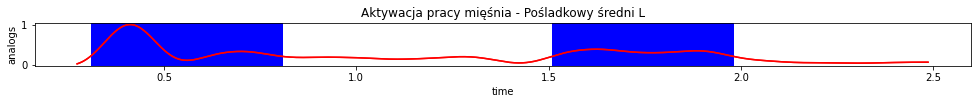

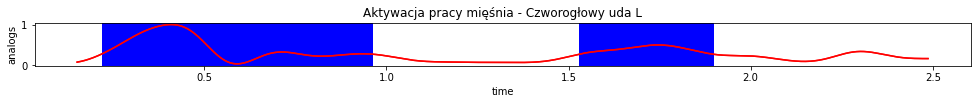

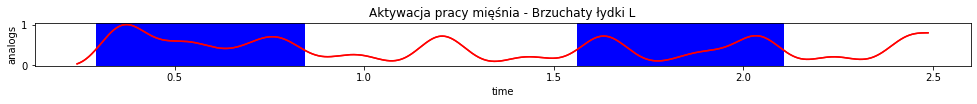

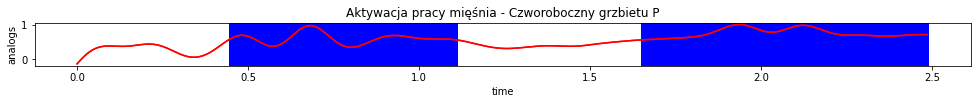

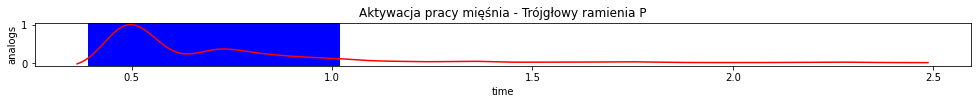

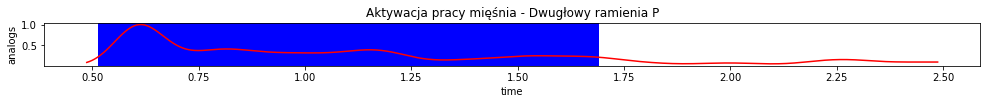

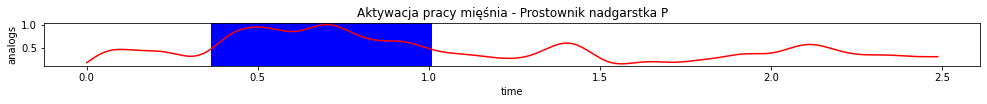

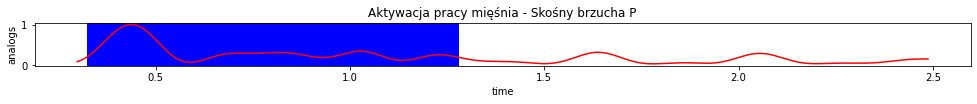

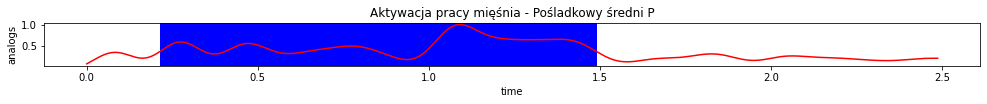

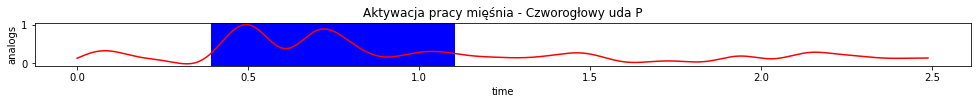

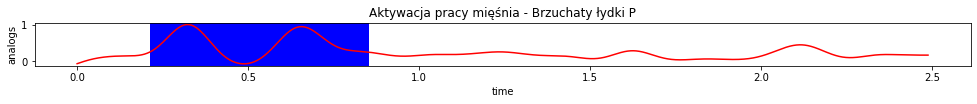

In [122]:
data_path=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K02.c3d"
onset_offset_muscles_z_przesunieciem(data_path)

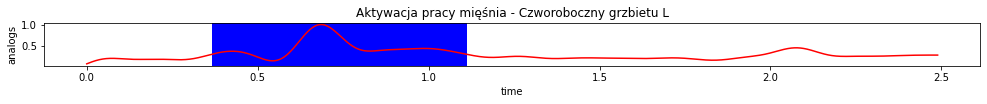

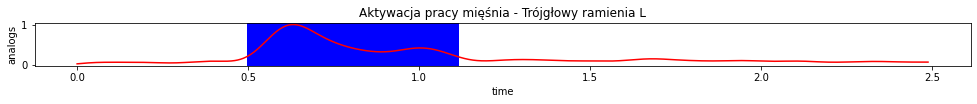

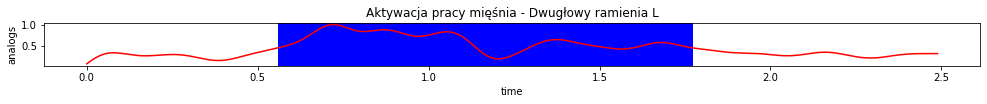

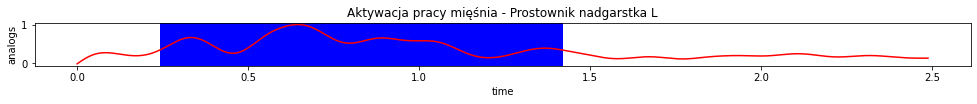

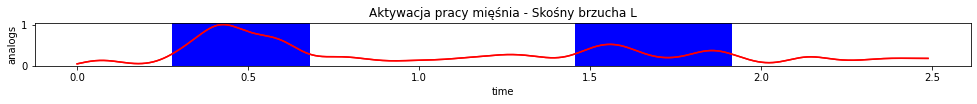

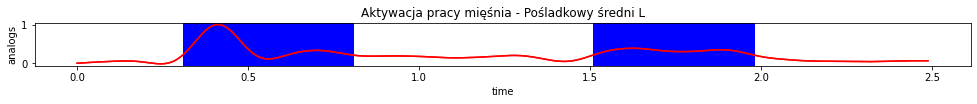

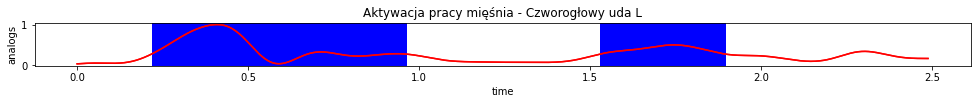

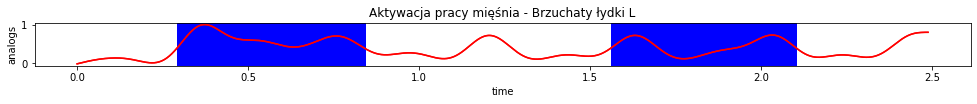

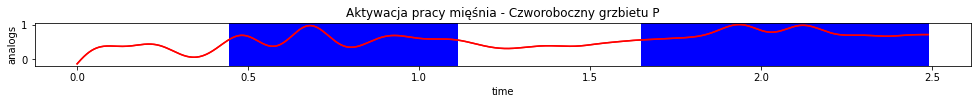

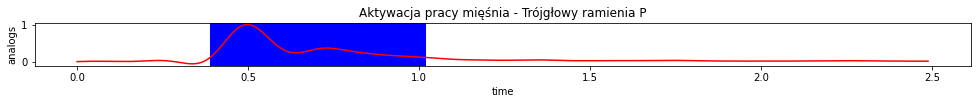

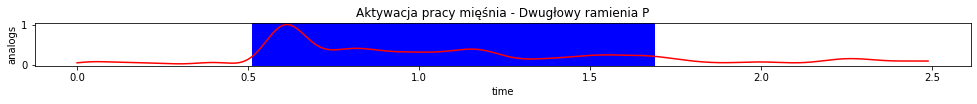

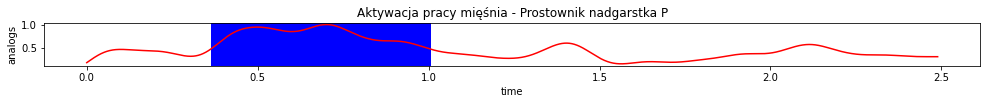

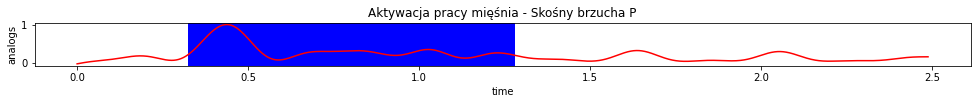

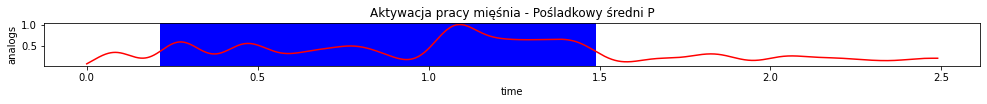

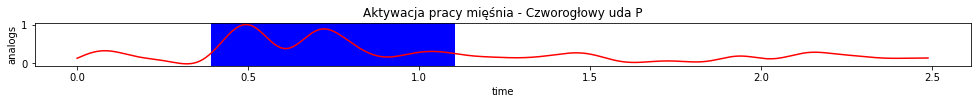

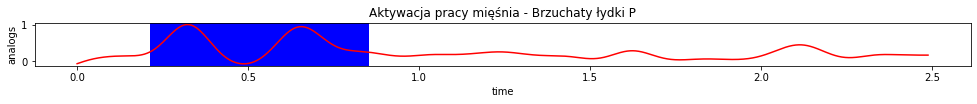

In [123]:
data_path=r"Z:\baza\2020-08-05-B0444-S01-E02-T01-K02.c3d"
onset_offset_muscles(data_path)